<H1>Inventory Management Analysis</H1>
<p>I'm going to try to calculate a number, which is a suggestion of how many pairs of shoes a store should have in stock.</p>
<p>The data that I going to use is fictitious</p>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
#load the data into pandas
df = pd.read_csv('practice.csv')
t_table = pd.read_csv('t_table.csv')
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Unnamed: 11,Month,SalePrice,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,52389,2014/1/1,United Kingdom,2152,UK2,Male,11.0,#REF!,#REF!,$159.00,0%,2014,1,$159.00,NaN,NaN,NaN
1,52390,2014/1/1,United States,2230,US15,Male,11.5,#REF!,#REF!,$199.00,20%,2014,1,$159.20,NaN,NaN,NaN
2,52391,2014/1/1,Canada,2160,CAN7,Male,9.5,#REF!,#REF!,$149.00,20%,2014,1,$119.20,NaN,NaN,NaN
3,52392,2014/1/1,United States,2234,US6,Female,9.5,#REF!,#REF!,$159.00,0%,2014,1,$159.00,NaN,NaN,NaN
4,52393,2014/1/1,United Kingdom,2222,UK4,Female,9.0,#REF!,#REF!,$159.00,0%,2014,1,$159.00,NaN,NaN,NaN


In [12]:
#remove meaningless columns 
df = df[['InvoiceNo', 'Date', 'Country', 'ProductID', 'Shop', 'Gender',
       'Size (US)', 'Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount','Unnamed: 11', 'Month', 'SalePrice']]
df = df.rename(columns = {'Unnamed: 11':'Year'})


<h3>Task 1: Calculate the confidence intervals for men shoes sales in the USA, this time based on a bigger sample - 2015-2016.</h3>

In [13]:
#prepare data for a task1
male = df.loc[df['Gender'].isin(['Male'])]
male_2015 = male.loc[male.Year.isin([2015]) & male.Country.isin(['United States'])]

#Group by shose size and month
def make_group(df):
    new_df = pd.pivot_table(df,index=['Size (US)'], columns=['Month'], values=['InvoiceNo'],aggfunc = 'count')
    new_df = new_df.fillna(0)
    return new_df
male_sizemonth_2015 = make_group(male_2015)


male_sizemonth_2015   

InvoiceNo                                                        \
Month            1     2     3     4     5     6     7     8     9     10   
Size (US)                                                                   
6.0             0.0   0.0   0.0   0.0   3.0   1.0   1.0   3.0   5.0   4.0   
6.5             4.0   1.0   0.0   1.0   0.0   0.0   2.0   3.0   0.0   1.0   
7.0             0.0   0.0   0.0   0.0   1.0   2.0   1.0   0.0   1.0   2.0   
7.5             0.0   1.0   2.0   1.0   0.0   0.0   3.0   2.0   3.0   2.0   
8.0             5.0   3.0   1.0   0.0   6.0   6.0   4.0   0.0   5.0   6.0   
8.5             4.0   5.0   3.0   1.0   2.0  11.0   6.0   6.0   4.0  12.0   
9.0            10.0  14.0   7.0   9.0  17.0  16.0  20.0  21.0  13.0  17.0   
9.5            18.0  16.0  23.0  15.0  16.0  16.0  19.0  26.0  25.0  17.0   
10.0            8.0  13.0  13.0  15.0   7.0  20.0  22.0  18.0  22.0  15.0   
10.5            7.0  13.0   8.0   8.0  15.0  10.0  16.0   8.0  16.0  16.0   
11.0            5.0   5.0   4.0   7.0   5.0   5.0   4.0   6.0   3.0   5.0   
11.5            3.0   3.0   2.0   3.0   6.0   9.0   6.0   6.0   3.0   8.0   
12.0            1.0   0.0   0.0   3.0   1.0   4.0   1.0   2.0   4.0   3.0   
13.0            0.0   0.0   1.0   0.0   1.0   3.0   1.0   0.0   0.0   3.0   
14.0            1.0   2.0   1.0   2.0   1.0   0.0   3.0   3.0   0.0   1.0   
15.0            0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   

                       
Month        11    12  
Size (US)              
6.0         0.0   0.0  
6.5         3.0   3.0  
7.0         2.0   3.0  
7.5         2.0   2.0  
8.0         3.0   3.0  
8.5         4.0   2.0  
9.0        10.0  12.0  
9.5        35.0  24.0  
10.0       11.0  14.0  
10.5       17.0  14.0  
11.0        5.0  10.0  
11.5        3.0   7.0  
12.0        6.0   3.0  
13.0        0.0   1.0  
14.0        2.0   2.0  
15.0        1.0   1.0

In [14]:
#calculate mean and std and std error 

#mean 
male_sizemonth_2015['MEAN'] = male_sizemonth_2015.mean(axis = 1)
#standard diviation
male_sizemonth_2015['STD'] = np.std(male_sizemonth_2015,axis = 1)
#std error
male_sizemonth_2015['STD_error'] = stats.sem(male_sizemonth_2015,axis=1)

In [15]:
#meke 95% confidence interval 
#call t_table a = 0.05 d.f = 11
t_table

#t_score is 2.179
t_score = 2.179
#calculate margine of error
male_sizemonth_2015['ME'] = male_sizemonth_2015.STD_error.apply(lambda x:x*t_score)
male_sizemonth_2015

InvoiceNo                                                        \
Month             1     2     3     4     5     6     7     8     9    10   
Size (US)                                                                   
6.0             0.0   0.0   0.0   0.0   3.0   1.0   1.0   3.0   5.0   4.0   
6.5             4.0   1.0   0.0   1.0   0.0   0.0   2.0   3.0   0.0   1.0   
7.0             0.0   0.0   0.0   0.0   1.0   2.0   1.0   0.0   1.0   2.0   
7.5             0.0   1.0   2.0   1.0   0.0   0.0   3.0   2.0   3.0   2.0   
8.0             5.0   3.0   1.0   0.0   6.0   6.0   4.0   0.0   5.0   6.0   
8.5             4.0   5.0   3.0   1.0   2.0  11.0   6.0   6.0   4.0  12.0   
9.0            10.0  14.0   7.0   9.0  17.0  16.0  20.0  21.0  13.0  17.0   
9.5            18.0  16.0  23.0  15.0  16.0  16.0  19.0  26.0  25.0  17.0   
10.0            8.0  13.0  13.0  15.0   7.0  20.0  22.0  18.0  22.0  15.0   
10.5            7.0  13.0   8.0   8.0  15.0  10.0  16.0   8.0  16.0  16.0   
11.0            5.0   5.0   4.0   7.0   5.0   5.0   4.0   6.0   3.0   5.0   
11.5            3.0   3.0   2.0   3.0   6.0   9.0   6.0   6.0   3.0   8.0   
12.0            1.0   0.0   0.0   3.0   1.0   4.0   1.0   2.0   4.0   3.0   
13.0            0.0   0.0   1.0   0.0   1.0   3.0   1.0   0.0   0.0   3.0   
14.0            1.0   2.0   1.0   2.0   1.0   0.0   3.0   3.0   0.0   1.0   
15.0            0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   

                            MEAN       STD STD_error        ME  
Month        11    12                                           
Size (US)                                                       
6.0         0.0   0.0   1.416667  1.685154  0.450784  0.982259  
6.5         3.0   3.0   1.500000  1.330124  0.355698  0.775065  
7.0         2.0   3.0   1.000000  0.960769  0.256792  0.559549  
7.5         2.0   2.0   1.500000  1.000000  0.269637  0.587539  
8.0         3.0   3.0   3.500000  2.056883  0.559306  1.218728  
8.5         4.0   2.0   5.000000  3.137858  0.849110  1.850211  
9.0        10.0  12.0  13.833333  4.091893  1.296199  2.824418  
9.5        35.0  24.0  20.833333  5.474884  1.828799  3.984953  
10.0       11.0  14.0  14.833333  4.554513  1.421526  3.097506  
10.5       17.0  14.0  12.333333  3.537347  1.135128  2.473443  
11.0        5.0  10.0   5.333333  1.632993  0.510231  1.111794  
11.5        3.0   7.0   4.916667  2.164693  0.611021  1.331415  
12.0        6.0   3.0   2.333333  1.679438  0.451272  0.983322  
13.0        0.0   1.0   0.833333  1.025320  0.274371  0.597855  
14.0        2.0   2.0   1.500000  0.919866  0.249312  0.543252  
15.0        1.0   1.0   0.416667  0.473665  0.126658  0.275988

In [16]:

#calculate 95%confidence interval
def ci_low(m,me):
    ci = m-me
    return ci

def ci_high(m,me):
    ci = m+me
    return ci


male_sizemonth_2015['CI_low'] = male_sizemonth_2015.apply(lambda x: ci_low(x['MEAN'],x['ME']),axis=1)
male_sizemonth_2015['CI_high'] = male_sizemonth_2015.apply(lambda x: ci_high(x['MEAN'],x['ME']),axis=1)

male_sizemonth_2015


InvoiceNo                                                        \
Month             1     2     3     4     5     6     7     8     9    10   
Size (US)                                                                   
6.0             0.0   0.0   0.0   0.0   3.0   1.0   1.0   3.0   5.0   4.0   
6.5             4.0   1.0   0.0   1.0   0.0   0.0   2.0   3.0   0.0   1.0   
7.0             0.0   0.0   0.0   0.0   1.0   2.0   1.0   0.0   1.0   2.0   
7.5             0.0   1.0   2.0   1.0   0.0   0.0   3.0   2.0   3.0   2.0   
8.0             5.0   3.0   1.0   0.0   6.0   6.0   4.0   0.0   5.0   6.0   
8.5             4.0   5.0   3.0   1.0   2.0  11.0   6.0   6.0   4.0  12.0   
9.0            10.0  14.0   7.0   9.0  17.0  16.0  20.0  21.0  13.0  17.0   
9.5            18.0  16.0  23.0  15.0  16.0  16.0  19.0  26.0  25.0  17.0   
10.0            8.0  13.0  13.0  15.0   7.0  20.0  22.0  18.0  22.0  15.0   
10.5            7.0  13.0   8.0   8.0  15.0  10.0  16.0   8.0  16.0  16.0   
11.0            5.0   5.0   4.0   7.0   5.0   5.0   4.0   6.0   3.0   5.0   
11.5            3.0   3.0   2.0   3.0   6.0   9.0   6.0   6.0   3.0   8.0   
12.0            1.0   0.0   0.0   3.0   1.0   4.0   1.0   2.0   4.0   3.0   
13.0            0.0   0.0   1.0   0.0   1.0   3.0   1.0   0.0   0.0   3.0   
14.0            1.0   2.0   1.0   2.0   1.0   0.0   3.0   3.0   0.0   1.0   
15.0            0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   

                            MEAN       STD STD_error        ME     CI_low  \
Month        11    12                                                       
Size (US)                                                                   
6.0         0.0   0.0   1.416667  1.685154  0.450784  0.982259   0.434407   
6.5         3.0   3.0   1.500000  1.330124  0.355698  0.775065   0.724935   
7.0         2.0   3.0   1.000000  0.960769  0.256792  0.559549   0.440451   
7.5         2.0   2.0   1.500000  1.000000  0.269637  0.587539   0.912461   
8.0         3.0   3.0   3.500000  2.056883  0.559306  1.218728   2.281272   
8.5         4.0   2.0   5.000000  3.137858  0.849110  1.850211   3.149789   
9.0        10.0  12.0  13.833333  4.091893  1.296199  2.824418  11.008915   
9.5        35.0  24.0  20.833333  5.474884  1.828799  3.984953  16.848381   
10.0       11.0  14.0  14.833333  4.554513  1.421526  3.097506  11.735828   
10.5       17.0  14.0  12.333333  3.537347  1.135128  2.473443   9.859890   
11.0        5.0  10.0   5.333333  1.632993  0.510231  1.111794   4.221539   
11.5        3.0   7.0   4.916667  2.164693  0.611021  1.331415   3.585252   
12.0        6.0   3.0   2.333333  1.679438  0.451272  0.983322   1.350011   
13.0        0.0   1.0   0.833333  1.025320  0.274371  0.597855   0.235478   
14.0        2.0   2.0   1.500000  0.919866  0.249312  0.543252   0.956748   
15.0        1.0   1.0   0.416667  0.473665  0.126658  0.275988   0.140679   

             CI_high  
Month                 
Size (US)             
6.0         2.398926  
6.5         2.275065  
7.0         1.559549  
7.5         2.087539  
8.0         4.718728  
8.5         6.850211  
9.0        16.657751  
9.5        24.818286  
10.0       17.930839  
10.5       14.806776  
11.0        6.445127  
11.5        6.248081  
12.0        3.316656  
13.0        1.431188  
14.0        2.043252  
15.0        0.692654

<h4> Interpretation from this chart</h4>
<p>The 95% of confidence . The true mean will fall into this confidence interval .</p>
<p> The small size pair of shoes for mans has more demand than large ones</p>
<p>The inventory manager can decide amount of stocks by refering the CI_low column and the CI_high column</p>

In [17]:
# make the function 
def suggestion(df,gender,year,country):
    gender =  df.loc[df.Gender.isin([gender])]
    df_filterd =gender.loc[gender.Year.isin([year]) & gender.Country.isin([country])]
    
                     
   
    
    def make_group(df):
        new_df = pd.pivot_table(df_filterd,index=['Size (US)'], columns=['Month'], values=['InvoiceNo'],aggfunc = 'count')
        new_df = new_df.fillna(0)
        return new_df

    #Group by shose size and month
    size_month = make_group(df_filterd)

    #calculate mean and std and std error 
    
    #mean 
    size_month['MEAN'] = size_month.mean(axis = 1)
    #standard diviation
    size_month['STD'] = np.std(size_month,axis = 1)
    #std error
    size_month['STD_error'] = stats.sem(size_month,axis=1)
    
    #meke 95% confidence interval 
    #t_score is 2.179
    t_score = 2.179
    #calculate margine of error
    size_month['ME'] = size_month.STD_error.apply(lambda x:x*t_score)
  
    #calculate 95%confidence interval
    def ci_low(m,me):
        ci = m-me
        return ci

    def ci_high(m,me):
        ci = m+me
        return ci


    size_month['CI_low'] = size_month.apply(lambda x: ci_low(x['MEAN'],x['ME']),axis=1)
    size_month['CI_high'] = size_month.apply(lambda x: ci_high(x['MEAN'],x['ME']),axis=1)
    
    return size_month


def make_plot_female(df):
    df['size(US)'] = np.arange(4.5,12.5,0.5)
    yerr = [df['CI_low'],df['CI_high']]
    f = plt.figure(figsize = (10,5))
    sns.set_style("whitegrid")
    plt.errorbar( df['size(US)'],df['MEAN'],xerr=0.1,yerr = yerr,linestyle='')
    plt.title('Inventory suggestion')
    plt.ylabel('Pair of shoes')
    plt.xlabel('Size(US)')
    plt.xticks(df['size(US)'])
    plt.show()
    
def make_plot_male(df):
    a = np.arange(6.0,12,0.5)
    b = np.arange(12.0,16.0,1.0)
    df['size(US)'] = np.concatenate([a,b])
    yerr = [df['CI_low'],df['CI_high']]
    f = plt.figure(figsize = (10,5))
    sns.set_style("whitegrid")
    plt.errorbar( df['size(US)'],df['MEAN'],xerr=0.1,yerr = yerr,linestyle='')
    plt.title('Inventory suggestion')
    plt.ylabel('Pair of shoes')
    plt.xlabel('Size(US)')
    plt.xticks(df['size(US)'])
    plt.show()
    



In [18]:
#how about the female's data with the same regulation as will as male df

female = suggestion(df,'Female',2015,'United States')


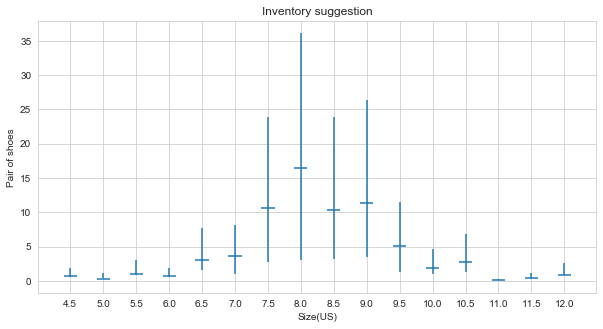

In [19]:
#Visualize 
make_plot_female(female)

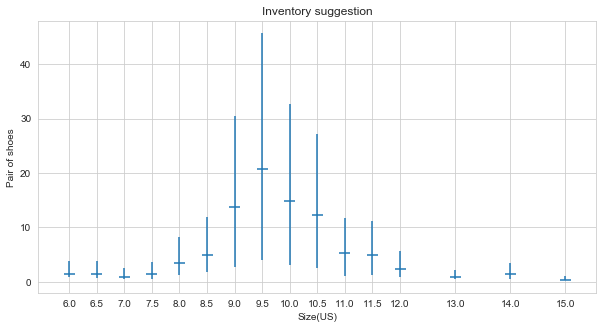

In [20]:
#compare male
make_plot_male(male_sizemonth_2015)

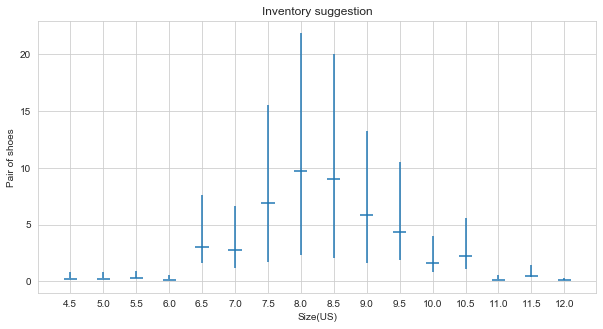

In [21]:
# How about Germany female and male on 2015
germany_female = suggestion(df,'Female',2015,'Germany')
make_plot_female(germany_female)

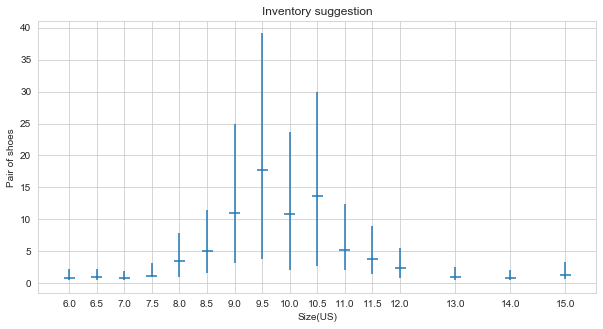

In [22]:
germany_male = suggestion(df,'Male',2015,'Germany')
make_plot_male(germany_male)

<p> Compare to US and Germany inventory, the chart of both countries is pretty similar</p>